In [19]:
import sympy as sy
from sympy import factorial,E
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

plt.style.use("dynamics_site")

## Exponential Laurent Series

In [20]:
def nseries(x,N):
    terms = [((-1)**i)*(x**(-2*i))/np.math.factorial(i) for i in range(N)]
    return np.sum(terms,axis=0)

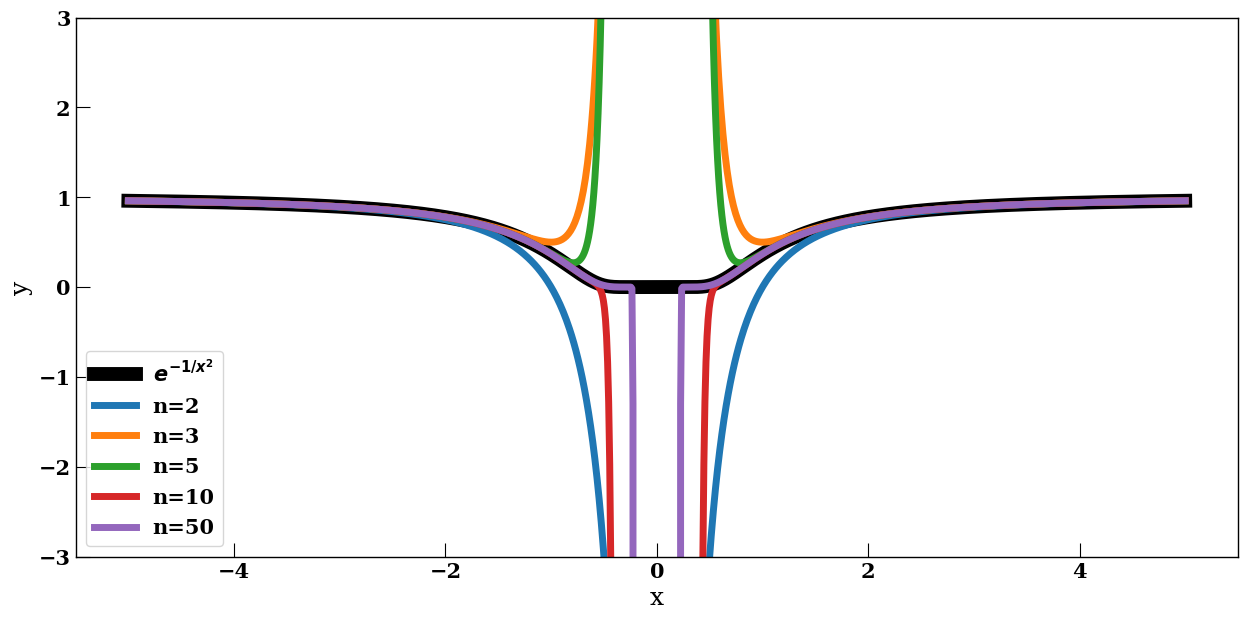

In [21]:
fig,ax = plt.subplots(figsize=(15,7))
xgrid = np.linspace(-5,5,1000)
ygrid = np.e**-(1/(xgrid**2))
plt.plot(xgrid,ygrid,c='k',label=r'$e^{-1/x^2}$',lw=10)
vals = [2,3,5,10,50]
for v in vals:
    plt.plot(xgrid,nseries(xgrid,v),label='n='+str(v))
plt.ylim(-3,3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('laurent1.png')

## Radial Laurent Series

In [22]:
# Define the variable and the function to approximate
r = sy.Symbol('r')
w = sy.Symbol('w')
f = (1/r)*(E**(-1/r)+1)
wf = f.subs(r,1/w)

#compute taylor series symbolically with sympy
def taylor(function,x0,n):
    terms = [(function.diff(w,i).subs(w,x0))/(factorial(i))*(w-x0)**i for i in range(n+1)]
    return sum(terms)

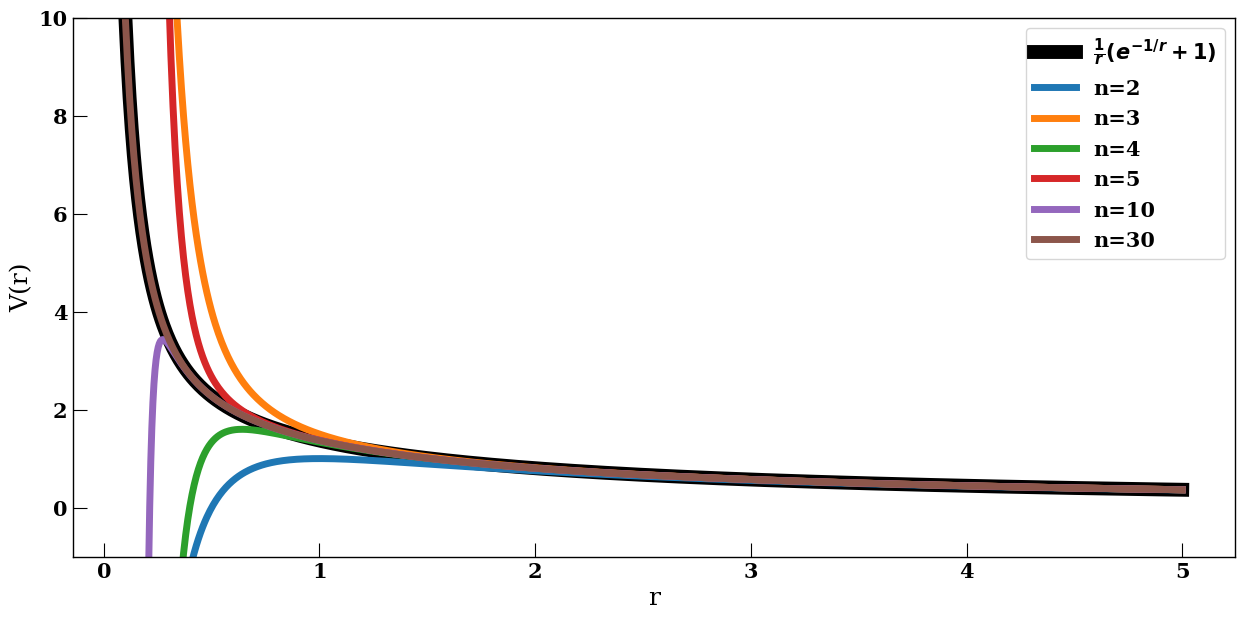

In [23]:
from sympy import lambdify

nf = lambdify(r, f)
fig,ax = plt.subplots(figsize=(15,7))
xgrid = np.linspace(1e-1,5,1000)
ygrid = nf(xgrid)
plt.plot(xgrid,ygrid,c='k',label=r'$\frac{1}{r}(e^{-1/r} + 1)$',lw=10)
vals = [2,3,4,5,10,30]
for v in vals:
    expression = taylor(wf,0,v).subs(w,1/r)
    approxf = lambdify(r, expression)
    plt.plot(xgrid,approxf(xgrid),label='n='+str(v))
plt.ylim(-1,10)
plt.legend()
plt.xlabel('r')
plt.ylabel('V(r)')

plt.savefig('laurent2.png')